In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")  # Игнорировать предупреждения

In [3]:
# Загрузка данных
file_path = 'D:/Users/Стажировка/Данные/workspace.csv'
data = pd.read_csv(file_path)

# Вывод датафрейма в табличном виде (первые 10 строк)
print("Первые 10 строк и датафрейма:")
display(data.head(10))

# Вывод последних 10 строк  датафрейма
print("\nПоследние 10 строк и датафрейма:")
display(data.tail(10))

# Получение количества заказов (количество строк в датафрейме)
order_count = len(data)
print("\nКоличество заказов:", order_count)

Первые 10 строк и датафрейма:


,Название,Стоимость,Статус
0,Разработка бренд-стратегии и маркетинговой стр...,до 100 000,Идет прием заявок
1,Телеграм-бот для взаимодействия с клиентами,до 100 000,Идет прием заявок
2,Идентично повторить лендинг (все материалы есть),до 100 000,Идет прием заявок
3,Поддержка и оптимизация CRM (строительная комп...,до 100 000,Идет прием заявок
4,"Ведение социальных сетей (ВК, Инст) для отеля ...",до 100 000,Идет прием заявок
5,Сайт-платформа для онлайн-школы,до 200 000,Завершён
6,Сайт для торговой организации,до 200 000,Идет прием заявок
7,Исправить некоторые моменты на уже существующе...,100 000 - 400 000,Идет прием заявок
8,Промо-игра для девелопера,400 000 - 1 600 000,Идет прием заявок
9,Лендинг для транспортной компании,до 200 000,Идет прием заявок



Последние 10 строк и датафрейма:


,Название,Стоимость,Статус
12476,Привлечь внимание людей,до 80 000,Завершён
12477,Разработать личный сайт на на платформе WordPress,до 50 000,Завершён
12478,Требуется таргетолог,до 50 000,Завершён
12479,"Ведение групп в соц сетях - вк, инст, фб по те...",до 30 000,Завершён
12480,Разработать личный кабинет жителя (для управля...,600 000 - 1 000 000,Завершён
12481,Настройка и ведение рекламных кампаний в Яндек...,до 35 000,Завершён
12482,Разработать мобильное приложение для b2b клиентов,1 000 000 - 1 500 000,Завершён
12483,Проводить оптимизацию ресурсов наших партнеров,70 000 - 130 000,Завершён
12484,Сделать редизайн сайта,80 000 - 160 000,Завершён
12485,"Привлечь торгово-сервисные предприятия, относя...",от 150 000,Завершён



Количество заказов: 12486


Количество заказов: 12486

In [4]:
# Проверка на пропуски
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

# Проверка на дубликаты
duplicate_rows = data[data.duplicated()]
print("\nДубликаты в данных:")
print(duplicate_rows)


Пропуски в данных:
Название     55
Стоимость     0
Статус        0
dtype: int64

Дубликаты в данных:
Empty DataFrame
Columns: [Название, Стоимость, Статус]
Index: []


Есть пропуски в названии заказа, оставляем дата фрейм так как есть. Дубликаты отсутствуют.

In [5]:
# Определение категорий по глаголам
categories = {
    'разработать': 'Разработка',
    'создать': 'Разработка',
    'сделать': 'Разработка',
    'настроить': 'Поддержка',
    'доработать': 'Поддержка',
    'запустить': 'Поддержка',
    'поддержка': 'Поддержка',
    'внедрить': 'Поддержка',
    'ведение': 'Поддержка',
    'организовать': 'Реклама и PR',
    'увеличить': 'Реклама и PR',
    'seo-оптимизация': 'Реклама и PR',
    'продвижение': 'Реклама и PR'
}

# Функция для определения категории по глаголу
def categorize_project(description):
    if pd.notna(description):
        words = re.findall(r'\w+', str(description).lower())
        for word in words:
            if word in categories:
                return categories[word]
        
        # Проверка наличия ключевых слов для изменения категории
        if 'лендинг' in words or 'телеграм-бот' in words or 'сайт' in words:
            return 'Разработка'
    
    return 'Другое'

# Добавление столбца "Категория" в датафрейм
data['Категория'] = data['Название'].apply(categorize_project)

# Опция для вывода всей строки
pd.set_option('display.max_colwidth', None)

# Вывод датафрейма с добавленной колонкой "Категория"
columns_to_display = ['Название', 'Стоимость', 'Статус', 'Категория']
print(data[columns_to_display])


                                                                                                                Название  \
0                                                                   Разработка бренд-стратегии и маркетинговой стратегии   
1                                                                            Телеграм-бот для взаимодействия с клиентами   
2                                                                       Идентично повторить лендинг (все материалы есть)   
3                                                                    Поддержка и оптимизация CRM (строительная компания)   
4                                           Ведение социальных сетей (ВК, Инст) для отеля 5* формата Ультра Всё Включено   
...                                                                                                                  ...   
12481                                            Настройка и ведение рекламных кампаний в Яндекс Директ и Google Adwords   
12482   

Категоризировать данные с данных сайта workspase.ru достаточно сложно, так как названия заказов очень разнятся. Тем не менее по ключевым словам сделали попытку. В дальнейшем посмотрим какое количество заказов относятся к нашему проекту.

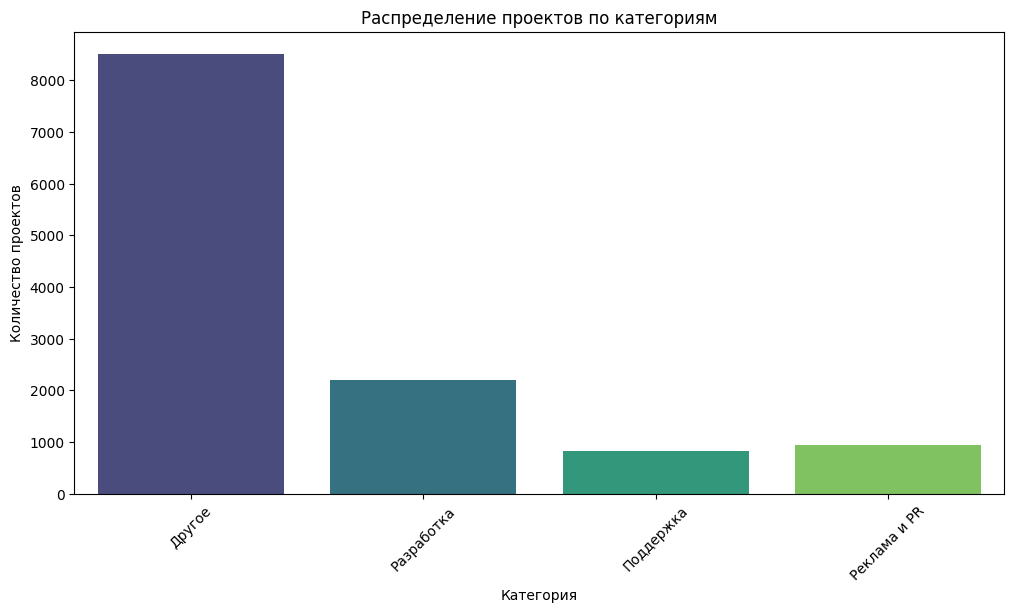

In [6]:
# Гистограмма категорий
plt.figure(figsize=(12, 6))
sns.countplot(x="Категория", data=data, palette="viridis", hue="Категория", legend=False)
plt.title("Распределение проектов по категориям")
plt.xlabel("Категория")
plt.ylabel("Количество проектов")
plt.xticks(rotation=45)
plt.show()

Как и было сказано ранее, категоризировать очень сложно, тем не менее мы видим что из нашего дата фрейма есть заказы по нашему проекту, что подтверждает гипотезу: "Искать заказы для нашего проекта на сайте workspase.ru" можно и нужно". Хотя для дополнительного анализа, необходимо проверить другие сайты, дополнить дата фрейм, так как заказы могут дублироваться, быть одними и теми же на разных источниках данных."

In [7]:
# Группировка данных по категории и подсчет количества заказов
orders_by_category = data['Категория'].value_counts().reset_index()
orders_by_category.columns = ['Категория', 'Количество заказов']
orders_by_category

,Категория,Количество заказов
0,Другое,8516
1,Разработка,2203
2,Реклама и PR,939
3,Поддержка,828


Видим количество заказов, которые могут быть потенциально нам интересны.

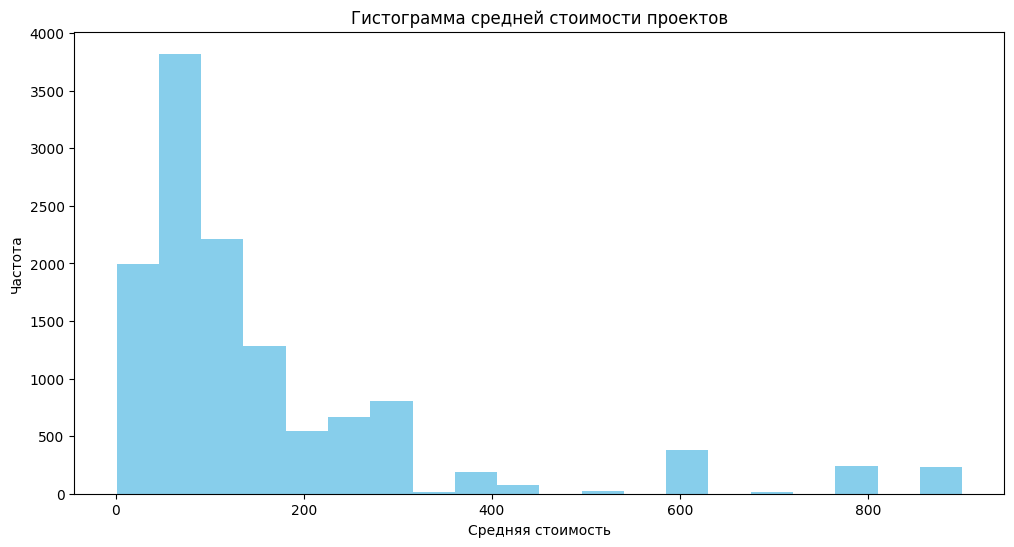

In [8]:
# Функция для извлечения средней стоимости
def extract_average_price(price_str):
    # Разделяем строку на части по пробелу
    parts = price_str.split()
    # Инициализируем список для хранения чисел
    prices = []
    for part in parts:
        # Удаляем лишние символы и проверяем, является ли часть числом
        cleaned_part = part.replace('до', '').replace('от', '').replace('-', '').replace(' ', '').replace('\xa0', '')
        if cleaned_part.isdigit():
            prices.append(int(cleaned_part))
    # Если есть числа, то возвращаем среднее, иначе возвращаем None
    if prices:
        # Если есть два числа, то возвращаем их среднее, иначе возвращаем единственное число
        if len(prices) == 2:
            return sum(prices) / 2
        else:
            return prices[0]
    else:
        return None

# Применяем функцию к столбцу 'Стоимость' и создаем новый столбец 'Средняя стоимость'
data['Средняя стоимость'] = data['Стоимость'].apply(extract_average_price)

# Создаем гистограмму средней стоимости
plt.figure(figsize=(12, 6))
plt.hist(data['Средняя стоимость'], bins=20, color='skyblue')
plt.xlabel('Средняя стоимость')
plt.ylabel('Частота')
plt.title('Гистограмма средней стоимости проектов')
plt.show()


Данная визуализация показывает нам стоимость заказов, в основном заказы распределены по стоимости до 250 тысяч рублей, однако есть небольшое количество заказов со стоимостью и 600 тысяч рублей и выше.

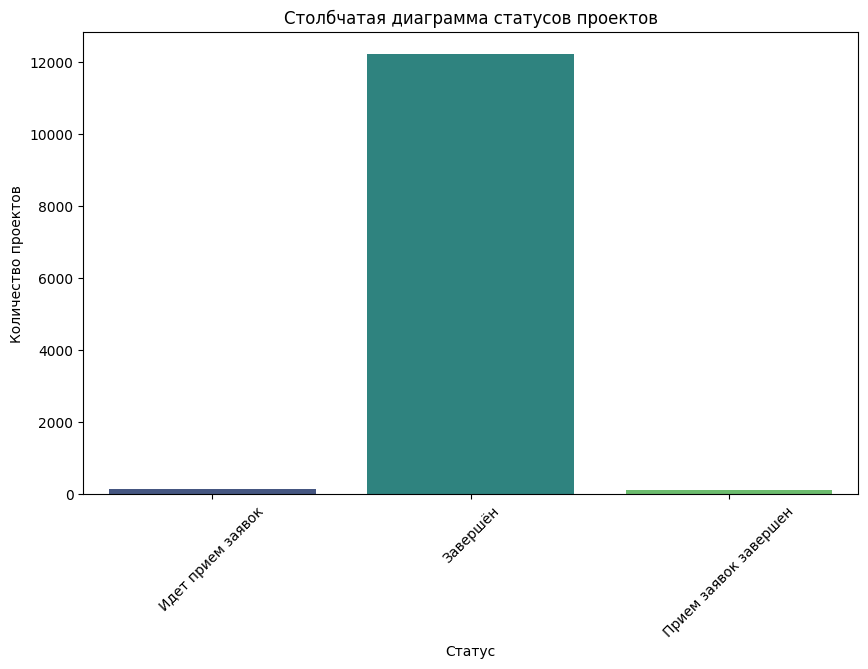

In [9]:
# Сстолбчатая диаграмма статусов проектов
plt.figure(figsize=(10, 6))
sns.countplot(x="Статус", data=data, palette="viridis")
plt.xlabel('Статус')
plt.ylabel('Количество проектов')
plt.title('Столбчатая диаграмма статусов проектов')
plt.xticks(rotation=45)  # Поворот подписи по оси x для лучшей читаемости
plt.show()

In [10]:
# Подсчет количества заявок в стадии "Идет прием заявок"
count_in_progress = data[data['Статус'] == 'Идет прием заявок']['Статус'].count()
print("Количество заявок в стадии 'Идет прием заявок':", count_in_progress)


Количество заявок в стадии 'Идет прием заявок': 151


Из данного дата фрейма видно что большее количество заказов по нашему проекту в стадии "Завершен", но также есть достаточное количество заказов в стадии идет прием заявок.

* Общий вывод: Был произведен сбор данных с сайта была произведена загрузка данных в файл CSV. Эти данные представляют собой список проектов с информацией о названии, стоимости, статусе и описании. В дальнейшем была произведена их обработка и первоначальный анализ.

* Попробовали категоризировать проекты по глаголам и ключевым словам. Например, глаголы "разработать", "создать" и "сделать" отнесены к категории "Разработка".  Если описание не содержит подходящих глаголов, проект помещается в категорию "Другое".

* Добавили новый столбец "Категория" в нашем датафрейме, применяя функцию к столбцу "Название".

* Для удобства вывода, мы настроили опцию, чтобы показывать всю строку данных, без обрезки.

* Затем мы создали гистограмму для визуализации распределения стоимости проектов. Мы выяснили, что большинство проектов имеют стоимость в пределах определенного диапазона.

* Также мы построили столбчатую диаграмму для подсчета количества проектов в каждом из статусов. Это позволило нам увидеть, сколько проектов находится в каждой стадии выполнения.

* Подсчитали количество заявок в стадии "Идет прием заявок" и вывели это число.

* В результате, мы успешно обработали данные, провели анализ и визуализацию, что помогло нам лучше понять характеристики проектов и их распределение. Самое главное, что и являлось целью нанализа, подтвердили гипотезу: 

* "Искать заказы для нашего проекта на сайте workspase.ru" можно и нужно". Хотя для дополнительного анализа, необходимо проверить другие сайты, дополнить дата фрейм, так как заказы могут дублироваться, быть одними и теми же на разных источниках данных."